### Regresión Lineal 10
## Métricas Regresión Lineal

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


#  Crossvalidation
# ------------------------------------------------------------------------------
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

En el pair programming anterior creastéis vuestro primer modelo de machine learning usando la regresion Lineal. Es el momento, que con vuestros datos evaluéis si es bueno haciendo predicciones. 

Los objetivo de este pairprogramming son:

Calculéis las métricas para vuestro modelo

Discutid los resultados de las métricas y extraed conclusiones

Guardad los resultados de las métricas en un csv para usarlo más adelante.

In [2]:
df = pd.read_csv('../datos/df_regresion.csv', index_col = 0)
df.head()

,City,Product_line,Unit_price,Quantity,Tax_5,Total,RATING_LOG,Gender_Female,Gender_Male,Payment_Cash,Payment_Credit card,Payment_Ewallet,mes_compra_February,mes_compra_January,mes_compra_March,Customer_type_Member,Customer_type_Normal,hora_compra_oe
0,2,3.5,0.431869,0.4,0.850677,0.850677,2.208274,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2
1,2,1.0,-0.886596,0.0,-0.500473,-0.500473,2.261763,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2
2,2,2.0,-0.197514,0.4,0.249843,0.249843,2.001480,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,2
3,2,3.5,0.066356,0.6,0.677951,0.677951,2.128232,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1
4,2,1.0,0.689747,0.4,1.096858,1.096858,1.667707,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,2


Realizamos todo el proceso inicial como en el jupyter anterior para a continuación sacar las métricas: 

separamos variables, separamos datos, creamos el modelo y lo entrenamos y sacamos las predicciones. 

In [3]:
X = df.drop('RATING_LOG', axis = 1)
y = df['RATING_LOG']

In [4]:

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [5]:
lr = LinearRegression(n_jobs=-1)

In [6]:
lr.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [7]:
y_predict_train = lr.predict(x_train) 
y_predict_test = lr.predict(x_test) 

In [8]:
train_df = pd.DataFrame({'Real': y_train, 'Predicted': y_predict_train, 'Set': ['Train']*len(y_train)})
test_df  = pd.DataFrame({'Real': y_test,  'Predicted': y_predict_test,  'Set': ['Test']*len(y_test)})
resultados = pd.concat([train_df,test_df], axis = 0)
resultados.head()

,Real,Predicted,Set
29,2.001480,1.914203,Train
535,2.001480,1.983382,Train
695,1.887070,1.913434,Train
557,1.504077,1.883418,Train
836,1.722767,1.933071,Train


In [9]:
resultados['residuos'] = resultados['Real'] - resultados['Predicted']
resultados.head()

,Real,Predicted,Set,residuos
29,2.001480,1.914203,Train,0.087277
535,2.001480,1.983382,Train,0.018098
695,1.887070,1.913434,Train,-0.026364
557,1.504077,1.883418,Train,-0.379341
836,1.722767,1.933071,Train,-0.210305


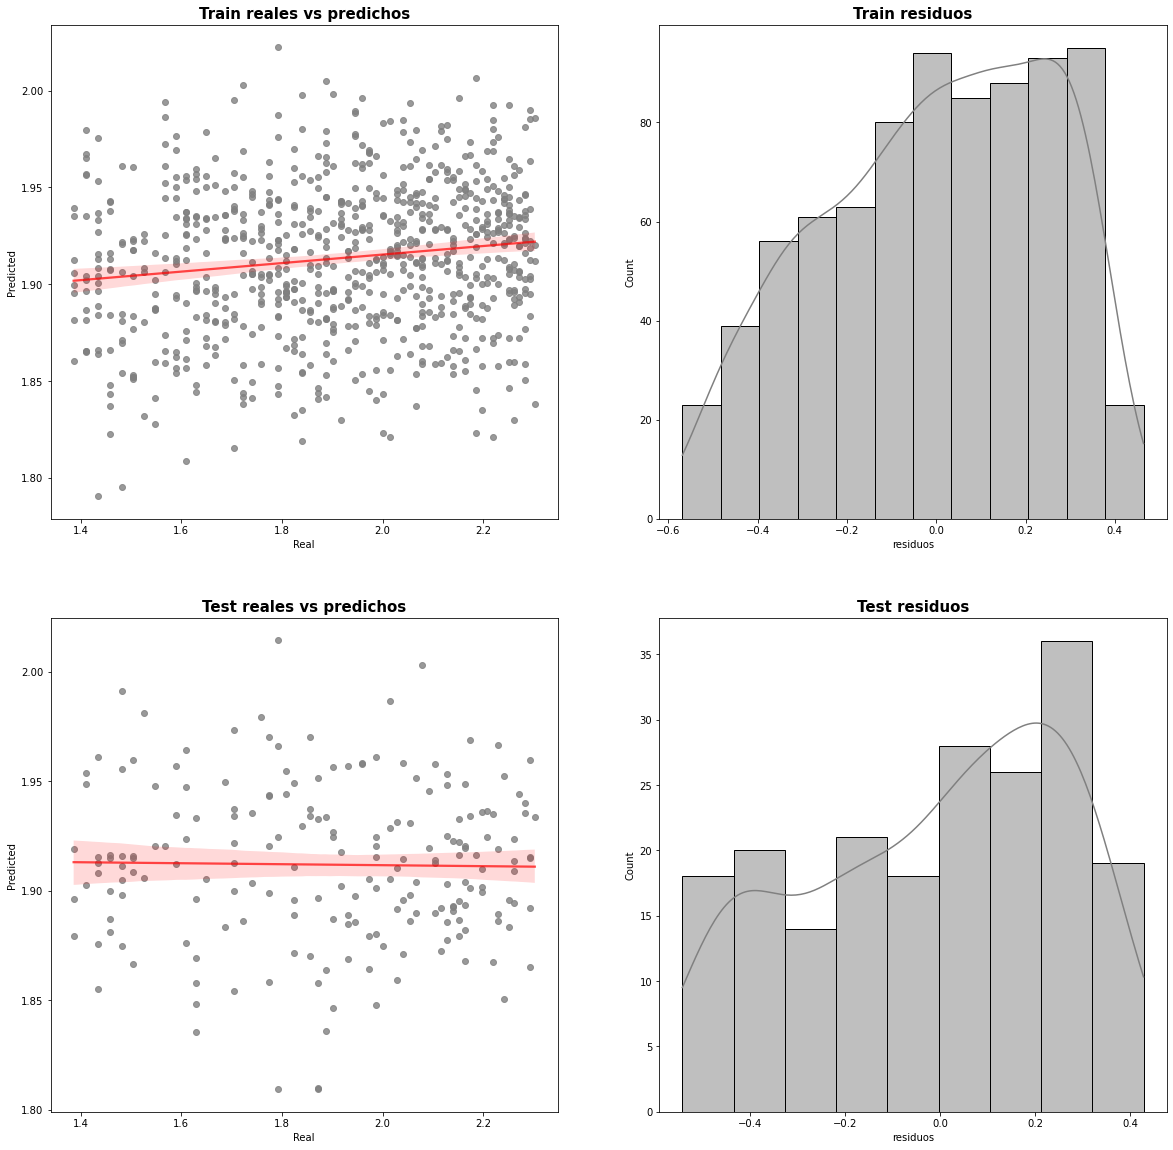

In [10]:
fig, ax = plt.subplots(2,2,figsize=(20,20))


# ploteamos los reales vs los predichos
sns.regplot(data = resultados[resultados['Set'] == "Train"], 
            x = "Real", 
            y = "Predicted", 
            ax = ax[0,0], 
            color = "grey",
            line_kws = {"color": "red", "alpha": 0.7 })


sns.regplot(data = resultados[resultados['Set'] == "Test"], 
            x = "Real",
            y = "Predicted", 
            color = "gray",
            line_kws = {"color": "red", "alpha": 0.7 }, 
            ax = ax[1,0])


# ploteamos los residuos
sns.histplot(resultados[resultados['Set'] == "Train"],
             x="residuos",
             color ="grey",
             kde=True, 
             ax = ax[0,1])


sns.histplot(resultados[resultados['Set'] == "Test"],
             x="residuos",
             color = "grey",
             kde=True, 
             ax = ax[1,1])

ax[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
ax[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
ax[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
ax[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold");


In [11]:
# Sacamos las métricas para el cojunto de entrenamiento. Vamos a sacar r2, MAE, MSE y RMSE.
print('Para el conjunto train:')
print('El valor de r2 score es ',r2_score(y_train,y_predict_train))
print('El MAE es',mean_absolute_error(y_train,y_predict_train))
print('El MSE es',mean_squared_error(y_train,y_predict_train))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_train,y_predict_train)))


# Sacamos las mismas métricas que en el caso anterior para el conjunto de train
print('Para el conjunto test:')
print('El valor de r2 score es ',r2_score(y_test,y_predict_test))
print('El MAE es',mean_absolute_error(y_test,y_predict_test))
print('El MSE es',mean_squared_error(y_test,y_predict_test))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_test,y_predict_test)))

Para el conjunto train:
El valor de r2 score es  0.022030977051789802
El MAE es 0.2139533405406846
El MSE es 0.06380842106680362
EL RMSE es  0.25260328791764297
Para el conjunto test:
El valor de r2 score es  -0.02606083678133997
El MAE es 0.2314661527443786
El MSE es 0.07328786335548854
EL RMSE es  0.27071731262608334


In [12]:
resultados_metricas = {'MAE': [mean_absolute_error(y_test, y_predict_test), mean_absolute_error(y_train, y_predict_train)],
                'MSE': [mean_squared_error(y_test, y_predict_test), mean_squared_error(y_train, y_predict_train)],
                'RMSE': [np.sqrt(mean_squared_error(y_test, y_predict_test)), np.sqrt(mean_squared_error(y_train, y_predict_train))],
                'R2':  [r2_score(y_test, y_predict_test), r2_score(y_train, y_predict_train)],
                 "set": ["test", "train"], 
                 "modelo": ["Linear Regresion", "LinearRegression"]}

df_resultados = pd.DataFrame(resultados_metricas)

df_resultados

,MAE,MSE,RMSE,R2,set,modelo
0,0.231466,0.073288,0.270717,-0.026061,test,Linear Regresion
1,0.213953,0.063808,0.252603,0.022031,train,LinearRegression


In [13]:
df.head(5)

,City,Product_line,Unit_price,Quantity,Tax_5,Total,RATING_LOG,Gender_Female,Gender_Male,Payment_Cash,Payment_Credit card,Payment_Ewallet,mes_compra_February,mes_compra_January,mes_compra_March,Customer_type_Member,Customer_type_Normal,hora_compra_oe
0,2,3.5,0.431869,0.4,0.850677,0.850677,2.208274,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2
1,2,1.0,-0.886596,0.0,-0.500473,-0.500473,2.261763,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2
2,2,2.0,-0.197514,0.4,0.249843,0.249843,2.001480,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,2
3,2,3.5,0.066356,0.6,0.677951,0.677951,2.128232,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1
4,2,1.0,0.689747,0.4,1.096858,1.096858,1.667707,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,2


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
City,1000.0,1.668000,0.471167,1.000000,1.000000,2.000000e+00,2.000000,2.000000
Product_line,1000.0,2.256600,1.241482,1.000000,1.000000,1.800000e+00,3.500000,4.300000
Unit_price,1000.0,0.009812,0.587986,-1.001997,-0.496116,-4.987330e-17,0.503884,0.992676
Quantity,1000.0,0.102000,0.584686,-0.800000,-0.400000,0.000000e+00,0.600000,1.000000
Tax_5,1000.0,0.199231,0.708751,-0.700922,-0.373062,-4.998172e-17,0.626938,2.273677
Total,1000.0,0.199231,0.708751,-0.700922,-0.373062,-5.003593e-17,0.626938,2.273677
RATING_LOG,1000.0,1.909835,0.258068,1.386294,1.704748,1.945910e+00,2.140066,2.302585
Gender_Female,1000.0,0.501000,0.500249,0.000000,0.000000,1.000000e+00,1.000000,1.000000
Gender_Male,1000.0,0.499000,0.500249,0.000000,0.000000,0.000000e+00,1.000000,1.000000
Payment_Cash,1000.0,0.344000,0.475279,0.000000,0.000000,0.000000e+00,1.000000,1.000000


In [15]:
df_resultados

,MAE,MSE,RMSE,R2,set,modelo
0,0.231466,0.073288,0.270717,-0.026061,test,Linear Regresion
1,0.213953,0.063808,0.252603,0.022031,train,LinearRegression


In [16]:
df_resultados.to_csv('../datos/resultados_regresion.csv')

Interpretación de los resultados:

    - R2: 0.022031 en el conjunto de train, este número es muy bajo, por lo tanto, nuestras variables independientes o predictoras no explican nada de la variación de nuestra variable respuesta. El modelo no sirve.

In [17]:
df.head()

,City,Product_line,Unit_price,Quantity,Tax_5,Total,RATING_LOG,Gender_Female,Gender_Male,Payment_Cash,Payment_Credit card,Payment_Ewallet,mes_compra_February,mes_compra_January,mes_compra_March,Customer_type_Member,Customer_type_Normal,hora_compra_oe
0,2,3.5,0.431869,0.4,0.850677,0.850677,2.208274,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2
1,2,1.0,-0.886596,0.0,-0.500473,-0.500473,2.261763,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2
2,2,2.0,-0.197514,0.4,0.249843,0.249843,2.001480,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,2
3,2,3.5,0.066356,0.6,0.677951,0.677951,2.128232,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1
4,2,1.0,0.689747,0.4,1.096858,1.096858,1.667707,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,2


VAMOS A PROBAR QUITANDO LAS COLUMNAS QUE EN ORIGEN ERAN NUMÉRICAS

In [18]:
df2 = df.drop(['Unit_price','Quantity','Tax_5','Total'], axis = 1)

In [19]:
df2.head()

,City,Product_line,RATING_LOG,Gender_Female,Gender_Male,Payment_Cash,Payment_Credit card,Payment_Ewallet,mes_compra_February,mes_compra_January,mes_compra_March,Customer_type_Member,Customer_type_Normal,hora_compra_oe
0,2,3.5,2.208274,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2
1,2,1.0,2.261763,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2
2,2,2.0,2.001480,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,2
3,2,3.5,2.128232,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1
4,2,1.0,1.667707,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,2


In [20]:
X = df2.drop('RATING_LOG', axis = 1)
y = df2['RATING_LOG']

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [22]:
lr = LinearRegression(n_jobs=-1)

In [23]:
lr.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [24]:
y_predict_train = lr.predict(x_train) 
y_predict_test = lr.predict(x_test) 

In [25]:
train_df = pd.DataFrame({'Real': y_train, 'Predicted': y_predict_train, 'Set': ['Train']*len(y_train)})
test_df  = pd.DataFrame({'Real': y_test,  'Predicted': y_predict_test,  'Set': ['Test']*len(y_test)})
resultados = pd.concat([train_df,test_df], axis = 0)
resultados.head()

,Real,Predicted,Set
29,2.001480,1.891176,Train
535,2.001480,1.965923,Train
695,1.887070,1.916354,Train
557,1.504077,1.943058,Train
836,1.722767,1.930299,Train


In [26]:
resultados['residuos'] = resultados['Real'] - resultados['Predicted']
resultados.head()

,Real,Predicted,Set,residuos
29,2.001480,1.891176,Train,0.110304
535,2.001480,1.965923,Train,0.035557
695,1.887070,1.916354,Train,-0.029284
557,1.504077,1.943058,Train,-0.438980
836,1.722767,1.930299,Train,-0.207532


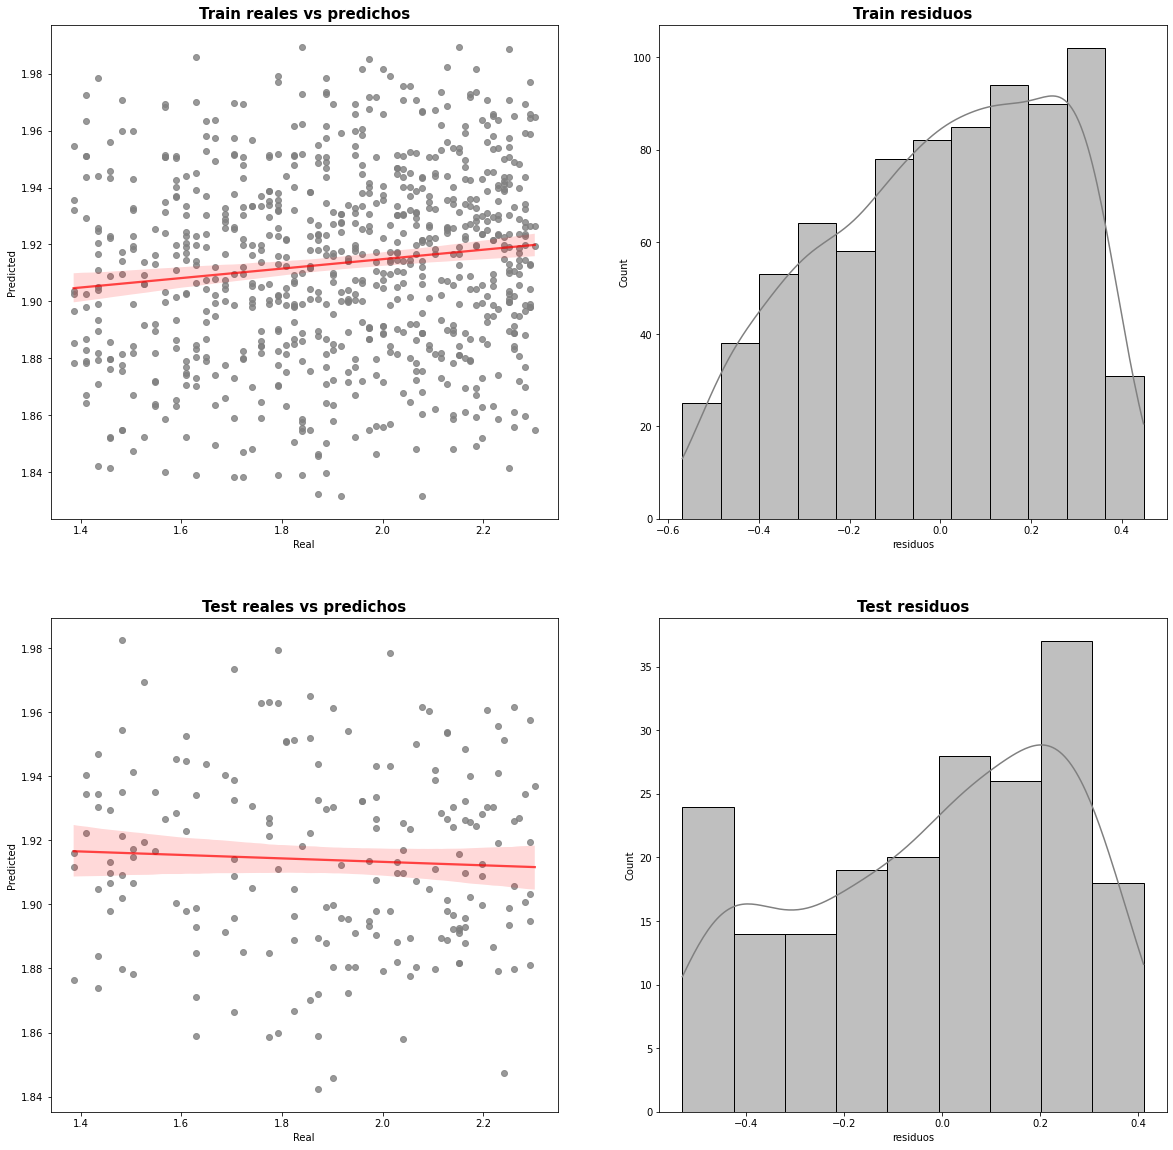

In [27]:
fig, ax = plt.subplots(2,2,figsize=(20,20))


# ploteamos los reales vs los predichos
sns.regplot(data = resultados[resultados['Set'] == "Train"], 
            x = "Real", 
            y = "Predicted", 
            ax = ax[0,0], 
            color = "grey",
            line_kws = {"color": "red", "alpha": 0.7 })


sns.regplot(data = resultados[resultados['Set'] == "Test"], 
            x = "Real",
            y = "Predicted", 
            color = "gray",
            line_kws = {"color": "red", "alpha": 0.7 }, 
            ax = ax[1,0])


# ploteamos los residuos
sns.histplot(resultados[resultados['Set'] == "Train"],
             x="residuos",
             color ="grey",
             kde=True, 
             ax = ax[0,1])


sns.histplot(resultados[resultados['Set'] == "Test"],
             x="residuos",
             color = "grey",
             kde=True, 
             ax = ax[1,1])

ax[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
ax[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
ax[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
ax[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold");


In [28]:
print('Para el conjunto train:')
print('El valor de r2 score es ',r2_score(y_train,y_predict_train))
print('El MAE es',mean_absolute_error(y_train,y_predict_train))
print('El MSE es',mean_squared_error(y_train,y_predict_train))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_train,y_predict_train)))

print('Para el conjunto test:')
print('El valor de r2 score es ',r2_score(y_test,y_predict_test))
print('El MAE es',mean_absolute_error(y_test,y_predict_test))
print('El MSE es',mean_squared_error(y_test,y_predict_test))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_test,y_predict_test)))

Para el conjunto train:
El valor de r2 score es  0.01661185346886529
El MAE es 0.21470732360507333
El MSE es 0.0641619963961631
EL RMSE es  0.25330218395458637
Para el conjunto test:
El valor de r2 score es  -0.027113649412262575
El MAE es 0.23068452888980973
El MSE es 0.07336306200401706
EL RMSE es  0.2708561647886514


In [29]:
resultados_metricas = {'MAE': [mean_absolute_error(y_test, y_predict_test), mean_absolute_error(y_train, y_predict_train)],
                'MSE': [mean_squared_error(y_test, y_predict_test), mean_squared_error(y_train, y_predict_train)],
                'RMSE': [np.sqrt(mean_squared_error(y_test, y_predict_test)), np.sqrt(mean_squared_error(y_train, y_predict_train))],
                'R2':  [r2_score(y_test, y_predict_test), r2_score(y_train, y_predict_train)],
                 "set": ["test", "train"], 
                 "modelo": ["Linear Regresion", "LinearRegression"]}

df_resultados = pd.DataFrame(resultados_metricas)

df_resultados

,MAE,MSE,RMSE,R2,set,modelo
0,0.230685,0.073363,0.270856,-0.027114,test,Linear Regresion
1,0.214707,0.064162,0.253302,0.016612,train,LinearRegression


Interpretación de los resultados:

    Tras quitar variables que hasta este momento consideramos de poca relevancia en el modelo, seguimos obteniendo malos resultados. 

    - R2: hemos obtenido un resultado inferior al primer modelo, que ya era muy bajo. Tenemos que pensar entonces que las variables que hemos quitado sí están influyendo algo.
